# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Data

Fruits 360 datasets: https:/www.kaggle.com/moltean/fruits  원본데이터 이미지 90000개짜리

In [ ]:
# jupyter notebook에서 shell 명령어(linux 명령어) 실행
!wget https://bit.ly/fruits_300 -O fruits_300.npy
# 웹주소(https:// ....) 에 있는 다운로드해서 파일(fruits_300.npy)로 저장

--2021-03-23 00:44:09--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-23 00:44:09--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-23 00:44:09--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

In [ ]:
# 파일을 읽어서 numpy 배열을 리턴
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape     # (n_samples, height, width), 100x100 크기의 흑백이미지 300개

(300, 100, 100)

# 데이터 시각화

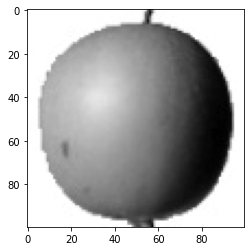

In [ ]:
# 첫번째 이미지 시각화
plt.imshow(fruits[0], cmap='binary')
plt.show()

In [ ]:
# 100개 씩 그리기 -> 함수 만들기
def plot_fruits(images): 
  """ 한줄에 최대 10개의 이미지를 출력, 줄의 개수는 이미지의 개수에 따라서 결정
  """
  n = len(images)  # 이미지 개수
  cols = 10 # 한줄에 출력할 이미지 개수
  rows = int(np.ceil(n / cols))  # 이미지를 출력할 줄(행)의 개수 <- 인덱스는 정수여야함
  # 이미지를 출력할 행/열의 개수만큼 subplot을 생성
  # figsize = (width, height)
  fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows))

  for i in range(rows):
    for j in range(cols):
        img_arr = i*10 + j
        if rows == 1:   # 행의 개수가 1이면, subplot은 1차원 배열
          if img_arr < n:
            axes[img_arr].imshow(images[img_arr], cmap=plt.cm.binary)
          axes[img_arr].axis('off')
        else:
          if img_arr < n:
            axes[i, j].imshow(images[img_arr], cmap=plt.cm.binary)
          axes[i, j].axis('off')

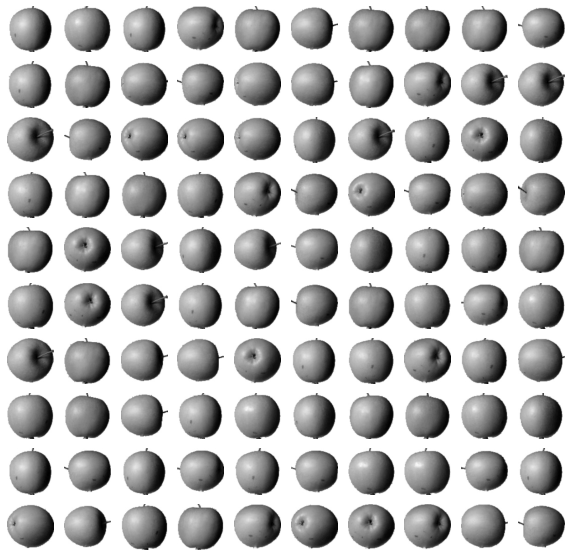

In [ ]:
plot_fruits(fruits[:100])
plt.show()

# 이미지 픽셀 분석

In [ ]:
fruits.shape

(300, 100, 100)

In [ ]:
apples = fruits[0:100].reshape((100, 100*100)) 
#> (100, 100, 100) 모양의 3차원 배열을 (100, 10_000) 모양의 2차원 배열로 변환
apples.shape

(100, 10000)

In [ ]:
pineapples = fruits[100:200].reshape((100, 100*100))
bananas = fruits[200:300].reshape((100, 100*100))

## 각각의 이미지의 모든 픽셀 평균

In [ ]:
apples_mean = np.mean(apples, axis=1)
apples_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

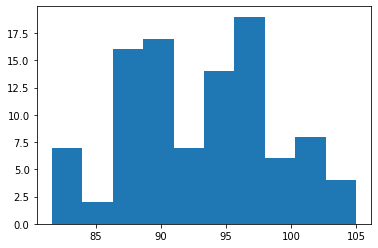

In [ ]:
# 사과 이미지의 픽셀들의 평균 분포
plt.hist(apples_mean)
plt.show()

In [ ]:
pineapples_mean = np.mean(pineapples, axis=1)
bananas_mean = np.mean(bananas, axis=1)

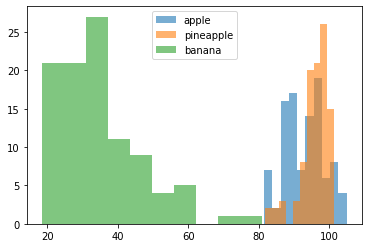

In [ ]:
plt.hist(apples_mean, alpha=0.6, label='apple')
plt.hist(pineapples_mean, alpha=0.6, label='pineapple')
plt.hist(bananas_mean, alpha=0.6, label='banana')

plt.legend()
plt.show()

## 픽셀들의 평균

In [ ]:
apples.shape

(100, 10000)

In [ ]:
apple_px_mean = np.mean(apples, axis=0)
apple_px_mean.shape

(10000,)

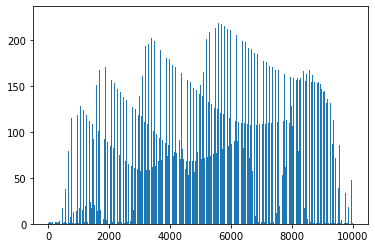

In [ ]:
plt.bar(x=np.arange(10_000), height=apple_px_mean)
plt.show()

In [ ]:
pineapples_px_mean = np.mean(pineapples, axis=0)
pineapples_px_mean.shape

(10000,)

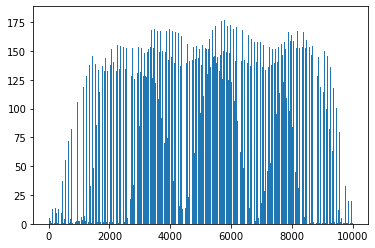

In [ ]:
plt.bar(x=np.arange(10_000), height=pineapples_px_mean)
plt.show()

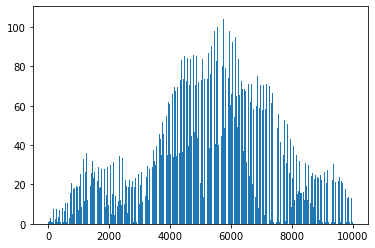

In [ ]:
banana_px_mean = np.mean(bananas, axis=0)
plt.bar(x=np.arange(10_000), height=banana_px_mean)
plt.show()

## 픽셀들의 평균을 100x100 모양의 이미지로 출력

In [ ]:
apple_px_mean.shape

(10000,)

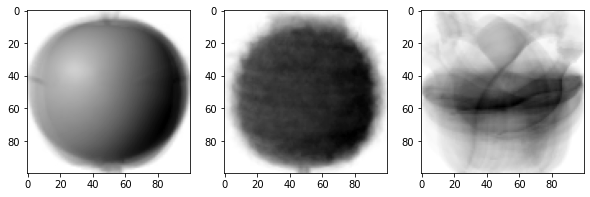

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
axes[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
axes[1].imshow(pineapples_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
axes[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

# 픽셀들의 평균과 비슷한 이미지들 찾기

In [ ]:
fruits.shape

(300, 100, 100)

각각의 이미지와 픽셀들의 평균을 비교하기 위해서는 3차원배열을 2차원 배열로 변환하는 것이 편함

In [ ]:
fruits_2d = fruits.reshape((300, 100*100))
fruits_2d.shape

(300, 10000)

## 사과의 픽셀 평균들과 비슷한 이미지들

In [ ]:
# 각 픽셀들이 떨어져 있는 거리
px_diff = fruits_2d - apple_px_mean   #> (300, 10_000)
px_diff.shape

(300, 10000)

In [ ]:
# 거리의 제곱의 합
dist_sq = np.sum(px_diff**2, axis=1)  #> (300, )
dist_sq.shape

(300,)

In [ ]:
np.random.seed(42)
arr = np.random.uniform(0, 10, size=5)
print(arr)
arr.sort()  # 배열 arr을 오름차순으로 정렬해서 순서를 바꿈
arr[:3]

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]


array([1.5601864 , 3.74540119, 5.98658484])

In [ ]:
np.random.seed(42)
arr = np.random.uniform(0, 10, size=5)
print(arr)
idx = arr.argsort()   # 오름차순 정렬된 배열을 만들 수 있는 인덱스
print(idx)
print(arr[idx])

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
[4 0 3 2 1]
[1.5601864  3.74540119 5.98658484 7.31993942 9.50714306]


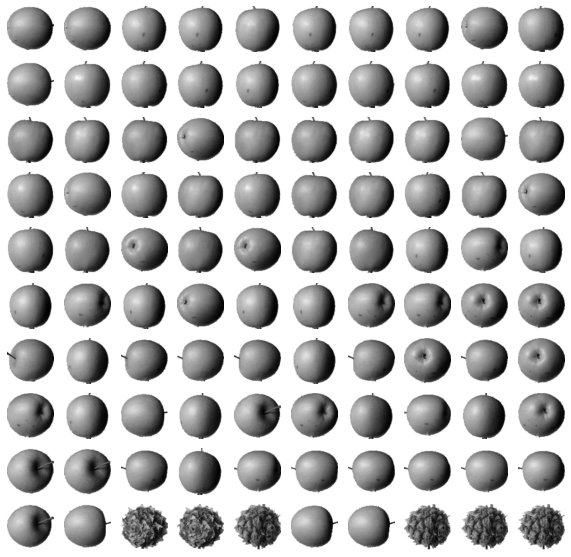

In [ ]:
# 거리 제곱들을 정렬해서 작은 순서로 100개 선택
idx = dist_sq.argsort()
apple_like = idx[:100]   # 사과의 평균 픽셀과 가까운 100개의 인덱스
plot_fruits(fruits[apple_like])

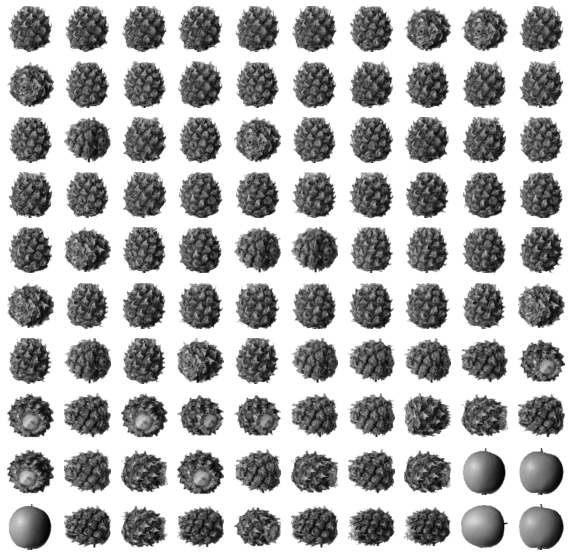

In [ ]:
# 파인 애플 픽셀들의 평균과 가까운 이미지 100개 출력
pine_dis = fruits_2d - pineapples_px_mean
dist_sq = np.sum(pine_dis**2, axis=1)
idx = dist_sq.argsort()
pine_like = idx[:100]
plot_fruits(fruits[pine_like])

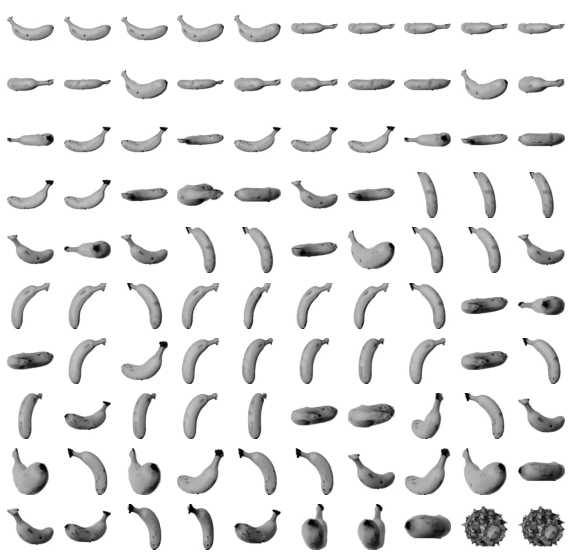

In [ ]:
# 바나나 픽셀들의 평균과 가까운 이미지 100개 출력
banana_dis = fruits_2d - banana_px_mean
dist_sq = np.sum(banana_dis**2, axis=1)
idx = dist_sq.argsort()
banana_like = idx[:100]
plot_fruits(fruits[banana_like])

In [ ]:
apple_like

array([ 12,  38,  30,  47,  76,  84,  66,  53,  24,  48,  69,  87,  33,
        27,  73,  70,  57,  68,  74,  86,   7,  54,  11,  90,  56,  61,
        31,  16,  98,   4,  78,  14,   1,  93,  59,   6,  49,  92,  40,
        23,  50,  32,  36,  71,  95,   8,  77,  10,   3,  65,   0,  94,
         2,  22,  80,  89,  97,  17,  96,  41,  39,  75,  35,  21,  55,
        43,  99,  28,  13,  64,  34,  82,  15,  25,  19,  67,  46,  58,
        79,  51,  60,  20,  37,  29,  83,  85,  81,   9,  45,  88,  26,
        63, 110, 120, 124,   5,  72, 192, 109, 102])

In [ ]:
pine_like

array([129, 152, 111, 148, 164, 137, 182, 117, 101, 136, 140, 175, 145,
       174, 161, 157, 166, 165, 150, 181, 144, 192, 193, 160, 120, 138,
       103, 162, 184, 122, 154, 176, 121, 100, 191, 155, 186, 104, 127,
       118, 105, 112, 131, 156, 102, 124, 106, 149, 158, 187, 110, 125,
       115, 177, 198, 188, 185, 133, 180, 141, 163, 109, 170, 183, 195,
       142, 159, 128, 147, 143, 107, 167, 139, 171, 168, 189, 119, 113,
       123, 190, 179, 151, 108, 172, 169, 197, 135, 116,  46,  77,  29,
       130, 146, 199, 114, 134, 196, 194,  15,  32])

In [ ]:
rms_a = np.sum((fruits_2d - apple_px_mean)**2, axis=1)
rms_p = np.sum((fruits_2d - pineapples_px_mean)**2, axis=1)
rms_b = np.sum((fruits_2d - banana_px_mean)**2, axis=1)
predict = []
for i in range(rms_a.shape[0]):
    idx = np.argmin([rms_a[i], rms_p[i], rms_b[i]])
    predict.append(idx)
predict = np.array(predict)

In [ ]:
np.unique(predict, return_counts=True)

(array([0, 1, 2]), array([ 98, 103,  99]))

## 픽셀들의 차이의 절대값으로 군집화

# K-Means Clustering

In [ ]:
km = KMeans(n_clusters=3, random_state=42)

In [ ]:
km.fit(fruits_2d)  # 비지도 학습(unsupervised learnig)인 경우에는 타겟(y)이 없음
# 모델 학습
# k개의 클러스터들의 중심(centroid)을 찾는 과정

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# 학습결과  - 3개 클러스터의 중심
km.cluster_centers_.shape  # (3, 100*100)

(3, 10000)

In [ ]:
center = km.cluster_centers_

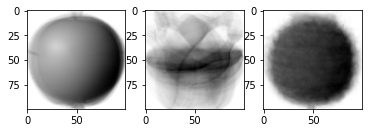

In [ ]:
# 클러스터 중심 시각화
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(center[0].reshape(100, 100), cmap='binary')
axes[1].imshow(center[1].reshape(100, 100), cmap='binary')
axes[2].imshow(center[2].reshape(100, 100), cmap='binary')

plt.show()

## 클러스터 레이블

In [ ]:
# 학습결과 - 타켓(레이블)
km.labels_.shape

(300,)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))

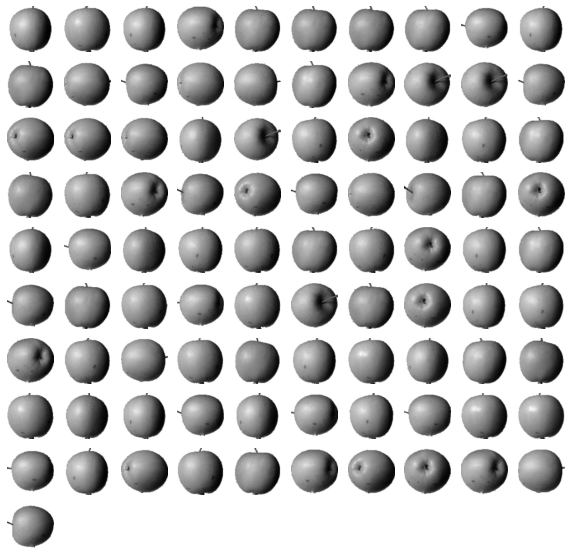

In [ ]:
plot_fruits(fruits[km.labels_ == 0])

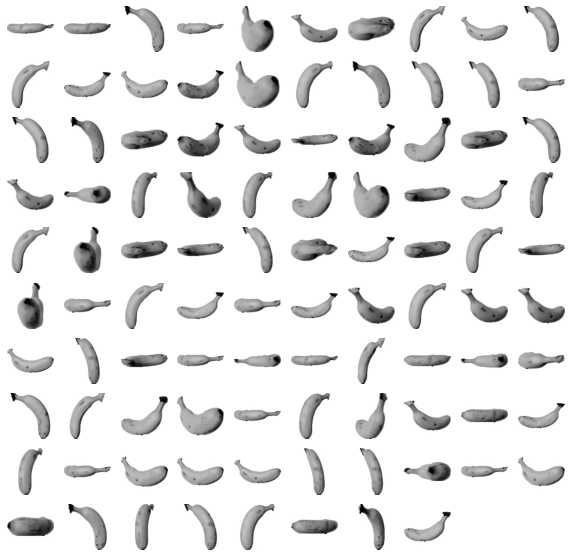

In [ ]:
plot_fruits(fruits[km.labels_ == 1])

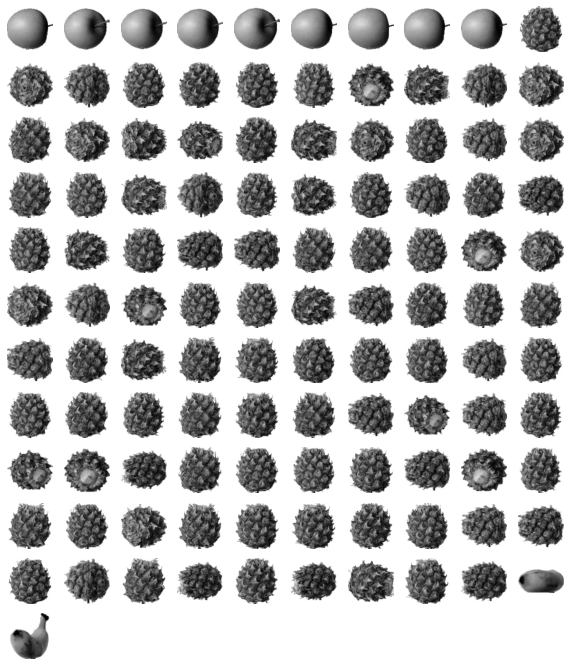

In [ ]:
plot_fruits(fruits[km.labels_ == 2])

`sklearn.cluster.KMeans.transform(X)` 메서드:
X에서 클러스터들의 중심까지의 거리들을 리턴.

In [ ]:
distances = km.transform(fruits_2d[:6])
distances.shape

(6, 3)

In [ ]:
distances

array([[3087.33092099, 8642.61845541, 4677.10527943],
       [2641.34592861, 9030.55531495, 5363.9344124 ],
       [3122.48819955, 8494.99543011, 4637.76848934],
       [3032.41637343, 9132.8299753 , 5319.2368841 ],
       [2656.96823141, 8461.52728232, 5039.67898148],
       [4874.81067384, 7855.57817995, 4368.90682127]])

In [ ]:
np.argmin(distances, axis=1)  km.labels_

array([0, 0, 0, 0, 0, 2])

KMeans 알고리즘:
* 설정한 k값 만큼의 클러스터들의 중심을 찾음(`KMeans.cluster_centers_`)
* transform() 메서드: 각 샘플에서 클러스터들의 중심까지의 거리를 계산.
* 각 샘플에서 클러스터들의 중심까지의 거리들 중 가장 가까운 거리의 인덱스(`KMeans.labels_`)


* 타겟이 없는 데이터들을 군집화(clustering)함.  

## 최적의 k 찾기


`inertia`:

* 클러스터의 중심과 클러스터에 속한 샘플들 사이의 거리들의 제곱의 합
* 클러스터에 속한 샘플들이 얼마나 가깝게 모여 있는지를 나타내는 값
* 일반적으로, 클러스터의 개수가 많을 수록 inertia 값은 작아짐.


In [ ]:
# k 값에 따른 inertia의 변화
inertias = []
ks = np.arange(2, 9)
for k in ks:   # 여러 개의 k값 마다 반복
  km = KMeans(n_clusters=k, random_state=42)  # 모델 생성
  km.fit(fruits_2d)   # 모델 훈련 - 클러스터 중심 찾기
  inertias.append(km.inertia_)

inertias

[5856532545.983117,
 5074977316.08837,
 4650031013.934268,
 4321786260.357199,
 4053173136.560072,
 3764082839.2808723,
 3457430801.500049]

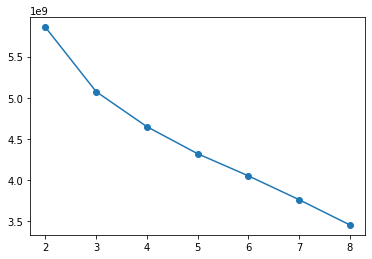

In [ ]:
plt.plot(ks, inertias, 'o-')
plt.show()

# MNIST KMeans

In [ ]:
mnist = fetch_openml(name='mnist_784')

In [ ]:
X = mnist['data'][:10_000]
X.shape

(10000, 784)

In [ ]:
np.unique(mnist['target'][:10_000], return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

In [ ]:
# k 값을 5~14 변화시키면서 inertia 계산 시각화
inertias = []
ks = np.arange(5, 15)
for k in ks:   # 여러 개의 k값 마다 반복
  km = KMeans(n_clusters=k, random_state=42)  # 모델 생성
  km.fit(X)   # 모델 훈련 - 클러스터 중심 찾기
  inertias.append(km.inertia_)

inertias

[28063168748.210064,
 27272597741.29526,
 26682922484.25566,
 26172984409.94951,
 25658676553.49368,
 25238980176.25412,
 24868162125.631004,
 24501344926.69495,
 24194084895.33462,
 23878241751.33137]

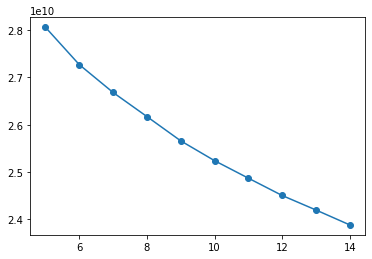

In [ ]:
plt.plot(ks, inertias, 'o-')
plt.show()

# PCA(Principal Component Analysis, 주성분분석)

In [ ]:
fruits.shape  # (300, 100, 100): n_samples, height, width

(300, 100, 100)

In [ ]:
fruits_2d.shape   # (300, 10_000): n_samples. height*width

(300, 10000)

In [ ]:
# 모델 생성
pca = PCA(n_components=50, random_state=42)

In [ ]:
# 모델 훈련
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# 훈련 결과 - 주성분(principal component)들을 찾음
pca.components_.shape   # (n_components, h*w)

(50, 10000)

In [ ]:
pca.n_components_   # fitting 후 찾은 주성분 개수

50

In [ ]:
components = pca.components_.reshape((-1, 100, 100))
components.shape

(50, 100, 100)

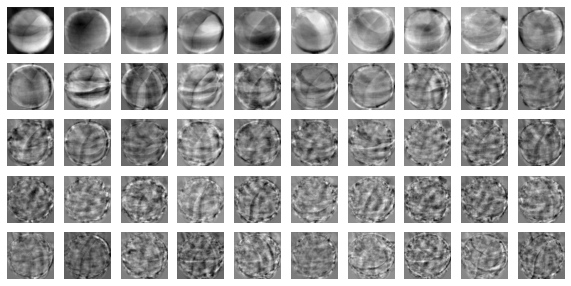

In [ ]:
plot_fruits(components)

In [ ]:
# 이미지 분석에서는 주성분 분석이 사진에 필터를 씌워주는 것을 의미

## 차원 축소 및 복원



* `PCA.transform(X)`: X의 차원을 축소
* `PCA.inverse_transform(X)`: 원래 차원으로 재구성(복원)

In [ ]:
fruits_2d_reduced = pca.transform(fruits_2d)
fruits_2d_reduced.shape  #(300, 50) (n_samples, n_components)
# (300, 10000) 모양의 fruits_2d 배열이 (300, 50) 모양의 fruits_2d_reduced 배열로 축소

(300, 50)

In [ ]:
fruits_2d_inverse = pca.inverse_transform(fruits_2d_reduced)
fruits_2d_inverse.shape   # (300, 10000)

(300, 10000)

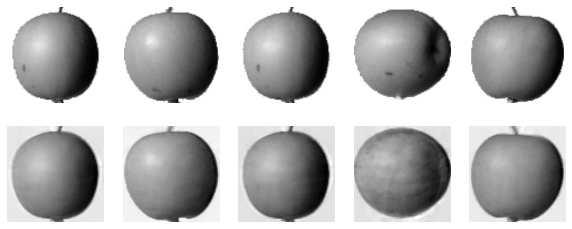

In [ ]:
# 차원 축소 전 원본 이미지 5개, 축소 후 복원된 이미지 5개
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
  ax[0, i].imshow(fruits[i], cmap=plt.cm.binary)
  ax[0, i].axis('off')
  ax[1, i].imshow(fruits_2d_inverse[i].reshape((100, 100)), cmap='binary')
  ax[1, i].axis('off')

plt.show()

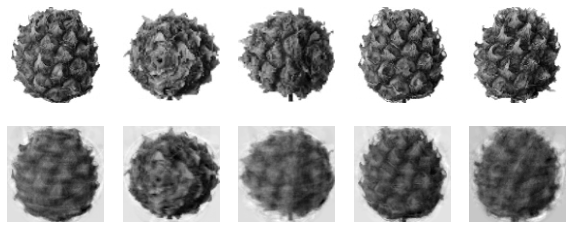

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
  ax[0, i].imshow(fruits[i+100], cmap=plt.cm.binary)
  ax[0, i].axis('off')
  ax[1, i].imshow(fruits_2d_inverse[i+100].reshape((100, 100)), cmap='binary')
  ax[1, i].axis('off')

plt.show()

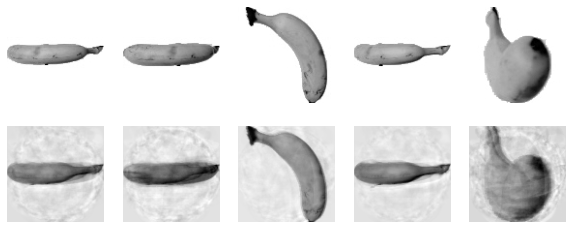

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
  ax[0, i].imshow(fruits[i+200], cmap=plt.cm.binary)
  ax[0, i].axis('off')
  ax[1, i].imshow(fruits_2d_inverse[i+200].reshape((100, 100)), cmap='binary')
  ax[1, i].axis('off')

plt.show()

## 설명된 분산(explained variance)

주성분(principal components)들이 원본 데이터의 분산(variance)을 얼마나 잘 설명하는지 정도를 나타내는 척도

In [ ]:
pca.explained_variance_.shape  #> (n_component, )

(50,)

In [ ]:
pca.explained_variance_
# 주성분(principal components)의 순서대로 원 데이터의 분산들이 설명되므로, 
# explained_variance_특성의 값들은 점점 작아지게 됨

array([13825250.21582002,  3244970.17261193,  2147002.11072804,
        1315766.76701664,  1115261.57182812,  1071019.42512441,
         839909.3351522 ,   670735.97206957,   447908.41090739,
         438278.50206896,   376058.33742495,   308314.26930361,
         286653.1247086 ,   276360.41324009,   226209.88296423,
         210588.11319903,   188950.25665911,   166854.81151665,
         158753.89250673,   156784.14766241,   146172.9076885 ,
         142739.15925164,   133183.8073018 ,   127118.51886608,
         121563.9978921 ,   117267.70755638,   108186.69143077,
         103713.31379144,    99261.91052115,    99135.70605002,
          94228.05385711,    90040.30447215,    86470.73077457,
          83465.17255061,    82295.02646471,    80663.90690084,
          78094.08591389,    75280.88252636,    72420.27941843,
          70737.72071461,    69455.75778694,    63067.95163101,
          62874.74546014,    62293.2008208 ,    59670.32106508,
          59000.95658326,    55741.88321

In [ ]:
# 설명된 분산 비율
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.005112  , 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408041, 0.00389459, 0.00372441,
       0.00359278, 0.00331456, 0.00317751, 0.00304113, 0.00303726,
       0.00288691, 0.0027586 , 0.00264924, 0.00255716, 0.00252131,
       0.00247134, 0.0023926 , 0.00230641, 0.00221877, 0.00216722,
       0.00212795, 0.00193224, 0.00192632, 0.0019085 , 0.00182815,
       0.00180764, 0.00170779, 0.00166414, 0.00162624, 0.00156195])

In [ ]:
np.sum(pca.explained_variance_ratio_)
# 50개의 주성분은 원 데이터(10_000개의 성분)의 분산의 92%를 설명한다.

0.9213948508475206

## 최적의 주성분 개수

In [ ]:
pca = PCA()  # PCA 모델 생성

In [ ]:
pca.fit(fruits_2d) # PCA 모델 훈련

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_.shape
# PCA 개체를 생성할 때 n_components를 설정하지 않으면, 
# 주성분의 개수는 원자료의 샘플 개수와, 성분개수 중에서 작은 값이 됨.

(300,)

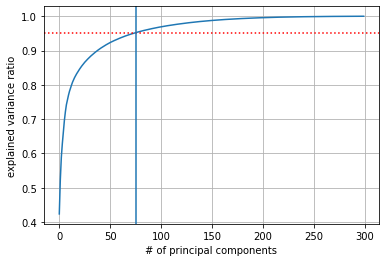

In [ ]:
# 누적 합계(cumulative sum)
evr_cumsum = np.cumsum(pca.explained_variance_ratio_)

# 설명된 분산 비율의 누적 합계 시각화
plt.plot(evr_cumsum)
plt.axhline(y=0.95, color='red', linestyle='dotted')  # 전체의 분산의 95%
plt.axvline(x=75)
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('explained variance ratio')
plt.show()

In [ ]:
pca = PCA(n_components=0.95, random_state=42)

In [ ]:
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

74

In [ ]:
fruits_2d_reduced = pca.transform(fruits_2d)  # 차원축소  10000 -> 74
fruits_2d_reduced.shape

(300, 74)

In [ ]:
fruits_2d_inverse = pca.inverse_transform(fruits_2d_reduced)  # 차원 재구성
fruits_2d_inverse.shape

(300, 10000)

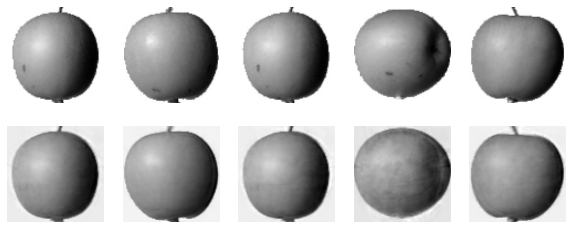

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
  ax[0, i].imshow(fruits[i], cmap=plt.cm.binary)
  ax[0, i].axis('off')
  ax[1, i].imshow(fruits_2d_inverse[i].reshape((100, 100)), cmap='binary')
  ax[1, i].axis('off')

plt.show()

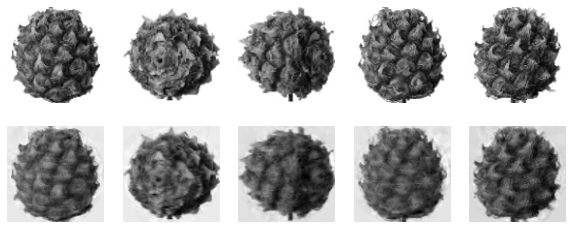

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(5):
  ax[0, i].imshow(fruits[i+100], cmap=plt.cm.binary)
  ax[0, i].axis('off')
  ax[1, i].imshow(fruits_2d_inverse[i+100].reshape((100, 100)), cmap='binary')
  ax[1, i].axis('off')

plt.show()

## 주성분 응용 - 시각화

In [ ]:
# 10,000차원 공간의 이미지들을 2차원의 공간으로 projection(투영)
pca = PCA(n_components=2, random_state=42)
pca.fit(fruits_2d)
fruits_2d_reduced = pca.transform(fruits_2d)  # 10,000차원에서 2차원
fruits_2d_reduced.shape

(300, 2)

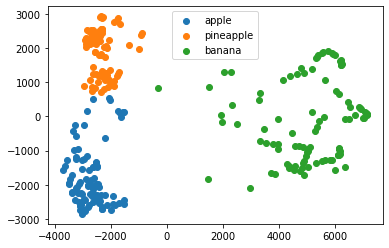

In [ ]:
X = fruits_2d_reduced
for i, target, in enumerate(['apple', 'pineapple', 'banana']):
  plt.scatter(X[i*100:(i+1)*100, 0], X[i*100:(i+1)*100, 1], label=target)

plt.legend()
plt.show()

## PCA 응용 - 훈련시간 단축, 성능 개선

차원 축소하지 않고 교차검증 수행 - 시간 측정, 성능측정

In [ ]:
X = fruits_2d   # 훈련 데이터
X.shape

(300, 10000)

In [ ]:
y = np.array([0] * 100 + [1] * 100 + [2] * 100) # 훈련 타겟
y.shape

(300,)

In [ ]:
log_clf = LogisticRegression(random_state=42)

In [ ]:
cv = cross_validate(estimator=log_clf, X=X, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

7.891467809677124

In [ ]:
np.sum(cv['score_time'])

0.03361058235168457

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([1.        , 1.        , 1.        , 0.98333333, 1.        ])

95% 분산을 설명하는 주성분을 찾아서 차원 축소 - 훈련시간, 성능

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduce = pca.transform(X)
X_reduce.shape

(300, 74)

In [ ]:
cv = cross_validate(estimator=log_clf, X=X_reduce, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

0.18517065048217773

In [ ]:
np.sum(cv['score_time'])

0.00212860107421875

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([1., 1., 1., 1., 1.])



* MNIST 데이터 셋에서 95% 분산을 설명할 수 있는 주성분들을 찾고
* 훈련 데이터 차원 축소 전, RandomForest 교차검증시간, 성능(score)
* 훈련데이터 차원 축소 후, RandomForest 교차검증시간, 성능(score)
* 

In [ ]:
mnist = fetch_openml(name='mnist_784')

In [ ]:
X = mnist['data'] 
y = mnist['target'].astype(np.int8)

In [ ]:
X.shape

(70000, 784)

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
cv = cross_validate(estimator=rf_clf, X=X, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

222.52173972129822

In [ ]:
np.sum(cv['score_time'])

3.5250244140625

In [ ]:
cv['train_score']

array([1.        , 1.        , 1.        , 1.        , 0.99998214])

In [ ]:
cv['test_score']

array([0.96914286, 0.96685714, 0.9655    , 0.967     , 0.97092857])

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduce = pca.transform(X)
X_reduce.shape

(70000, 154)

In [ ]:
cv = cross_validate(estimator=rf_clf, X=X_reduce, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

579.2195761203766

In [ ]:
np.sum(cv['score_time'])

2.5450074672698975

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([0.94721429, 0.94571429, 0.9445    , 0.94521429, 0.9525    ])

In [ ]:
pca = PCA(n_components=0.90)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduce = pca.transform(X)
X_reduce.shape

(70000, 87)

In [ ]:
cv = cross_validate(estimator=rf_clf, X=X_reduce, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

430.7241106033325

In [ ]:
np.sum(cv['score_time'])

2.359086275100708

In [ ]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
cv['test_score']

array([0.95314286, 0.94907143, 0.948     , 0.94692857, 0.95585714])

SGD도 해보기

In [ ]:
sgd_clf = SGDClassifier()

In [ ]:
cv = cross_validate(estimator=sgd_clf, X=X, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

788.0393226146698

In [ ]:
np.sum(cv['score_time'])

0.24635004997253418

In [ ]:
cv['train_score']

array([0.90151786, 0.88882143, 0.87421429, 0.88766071, 0.88669643])

In [ ]:
cv['test_score']

array([0.88792857, 0.87385714, 0.85457143, 0.87042857, 0.88671429])

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_reduce = pca.transform(X)
X_reduce.shape

(70000, 154)

In [ ]:
cv = cross_validate(estimator=sgd_clf, X=X_reduce, y=y, return_train_score=True)

In [ ]:
np.sum(cv['fit_time'])

234.98094749450684

In [ ]:
np.sum(cv['score_time'])

0.09218835830688477

In [ ]:
cv['train_score']

array([0.89098214, 0.889375  , 0.891875  , 0.89498214, 0.88801786])

In [ ]:
cv['test_score']

array([0.88614286, 0.87935714, 0.87728571, 0.88414286, 0.89592857])